In [3]:
# import library ที่สำคัญ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#load ข้อมูลเข้ามาเก็บใน datafram data
df=pd.read_excel('Universal_bank_dataset.xls','Data')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [18]:
df = df.drop(['ID', 'ZIP Code'], axis=1)
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [19]:
# One hot encoding
dummies = pd.get_dummies(df.Education)
merged = pd.concat([df,dummies],axis='columns')
merged

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,1,2,3
0,25,1,49,4,1.6,1,0,0,1,0,0,0,1,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0,1,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0,1,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0,0,0,1
4996,30,4,15,4,0.4,1,85,0,0,0,1,0,1,0,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0,0,0,1
4998,65,40,49,3,0.5,2,0,0,0,0,1,0,0,1,0


In [20]:
merged.columns

Index([               'Age',         'Experience',             'Income',
                   'Family',              'CCAvg',          'Education',
                 'Mortgage',      'Personal Loan', 'Securities Account',
               'CD Account',             'Online',         'CreditCard',
                          1,                    2,                    3],
      dtype='object')

In [21]:
df2 = merged.rename(columns={1: 'edu1', 2: 'edu2', 3: 'edu3'})
df2

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,edu1,edu2,edu3
0,25,1,49,4,1.6,1,0,0,1,0,0,0,1,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0,1,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0,1,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0,0,0,1
4996,30,4,15,4,0.4,1,85,0,0,0,1,0,1,0,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0,0,0,1
4998,65,40,49,3,0.5,2,0,0,0,0,1,0,0,1,0


In [22]:
df2.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'edu1', 'edu2', 'edu3'],
      dtype='object')

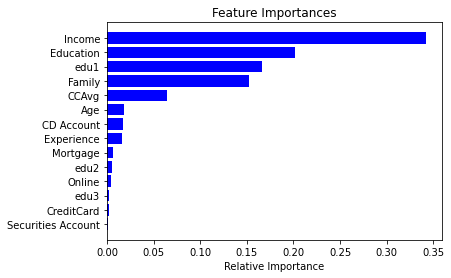

In [23]:
# หา Feature ที่มีผลต่อการทำนาย
# Random Forest
input_vars = [ 'Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'edu1', 'edu2', 'edu3']
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=10,n_estimators=100)
model.fit(df2[input_vars],df2['Personal Loan'])

# ต้องการให้เหลือ 3 ปัจจัย
n_features = 17

# Plot feature importance
features = df2[input_vars].columns
importances = model.feature_importances_
indices = np.argsort(importances)[-n_features:]  # sort top n features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [24]:
# ตัด Attribute ที่ไม่ค่อยมีผลออก
# เก็บข้อมูลที่ตัด Securities Account, CreditCard, Online แต่จะไม่ตัด edu3 เพราะมันเชื่อมกับ edu1 edu2 ด้วย
df3 = df2[[ 'Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 
       'CD Account', 'edu1', 'edu2', 'edu3']]
df3

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account,edu1,edu2,edu3
0,25,1,49,4,1.6,1,0,0,0,1,0,0
1,45,19,34,3,1.5,1,0,0,0,1,0,0
2,39,15,11,1,1.0,1,0,0,0,1,0,0
3,35,9,100,1,2.7,2,0,0,0,0,1,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,0,1
4996,30,4,15,4,0.4,1,85,0,0,1,0,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,1
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [25]:
# ทำการแบ่งข้อมูลก่อนเป็นชุด test(40%) train(60%) 
from sklearn.model_selection  import train_test_split
X = df3.drop(['Personal Loan'], axis='columns')
y = df3['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [26]:
# ทำการ scaling ด้วยวิธี standardization ที่ Input แต่ Output ไม่ต้องทำ
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Knn

In [27]:
# K = 1
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.965

# Deep Learning

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd

#(train_features, train_labels), (test_features, test_labels) = boston_housing.load_data()


train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)
X_train = (X_train - train_mean) / train_std


#tf.debugging.set_log_device_placement(True)
strategy = tf.distribute.MirroredStrategy()

with strategy.scope() :
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(20, activation='relu',input_shape=[len(X_train[0])]),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mae', 'mse', 'accuracy'])
     


early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(X_train, y_train, epochs=10, validation_split = 0.1)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch


# show RMSE measure to compare to Kaggle leaderboard on https://www.kaggle.com/c/boston-housing/leaderboard
rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))

print()
print('rmse: {}'.format(round(rmse_final, 3)))

test_features_norm = (X_test - train_mean) / train_std
_,_,_,accuracy = model.evaluate(test_features_norm, y_test)
print(accuracy)





Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op NoOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op NoOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op NoOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Random

In [ ]:
# ได้ Accuracy 95.34%